In [18]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
sns.set_theme(style="whitegrid")

# a - Exact Solution vs Truncated Fourier Series

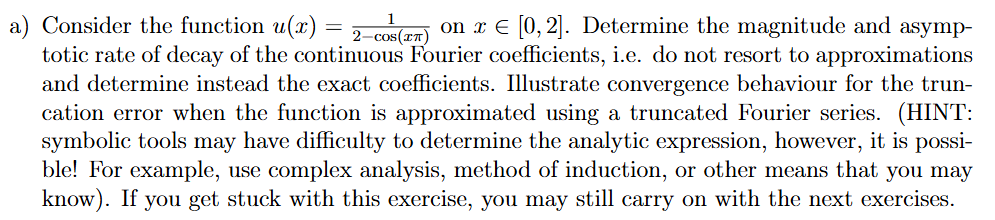

## Complex Coefficient Formula

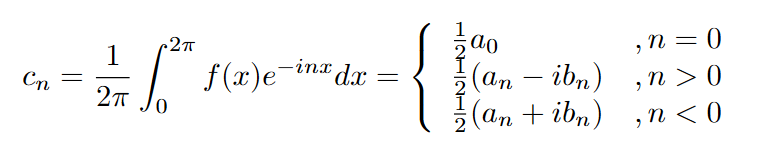

$$
u(x) = \frac{1}{2-\cos(πx)} \quad\quad x ∈ [0, 2]
$$

Known Solution

$$
C_n = \frac{1}{\sqrt{3}(2+\sqrt{3})^{|n|}}
$$

Solve this by the Residue Theorem

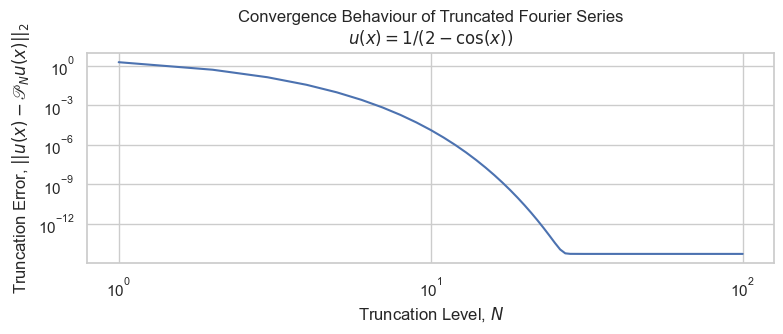

In [25]:
def C_n(n):
    quot = np.sqrt(3) * (2 + np.sqrt(3)) ** np.abs(n)
    return 1/quot

def u(x):
    return 1.0 / (2.0 - np.cos(x))


x = np.linspace(0, 2 * np.pi, 1000)
y_exact = u(x)


# Ns = [10, 50, 100, 300, 1000, 3000, 10000]
Ns = [1, 3, 10, 30, 100, 300]
Ns = np.geomspace(1, 100, 200, dtype=int)
errors = []

for N in Ns:
    y_trunc = np.zeros_like(x, dtype="complex")
    for n in range(-N, N + 1):
        y_trunc += C_n(n) * np.exp(1j * n * x)

    residual = y_exact - y_trunc
    errors.append(np.linalg.norm(residual))
    # y_trunc = np.real(y_trunc)
# plt.plot(x, y_trunc)
# plt.plot(x, y_exact)

plt.figure(figsize=(8, 3.5))
plt.title("Convergence Behaviour of Truncated Fourier Series\n$u(x) = 1 / (2 - \\cos(x))$")
plt.xlabel("Truncation Level, $N$")
plt.ylabel("Truncation Error, $||u(x) - 𝒫︀_N u(x)||_2$")
plt.loglog(Ns, errors)
plt.tight_layout()
plt.savefig("report/output/1a_fourier_truncation_convergence.png", dpi=600)


# b - DFT

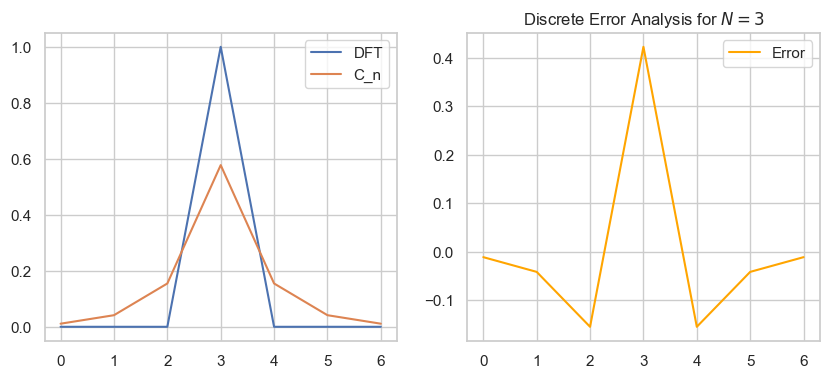

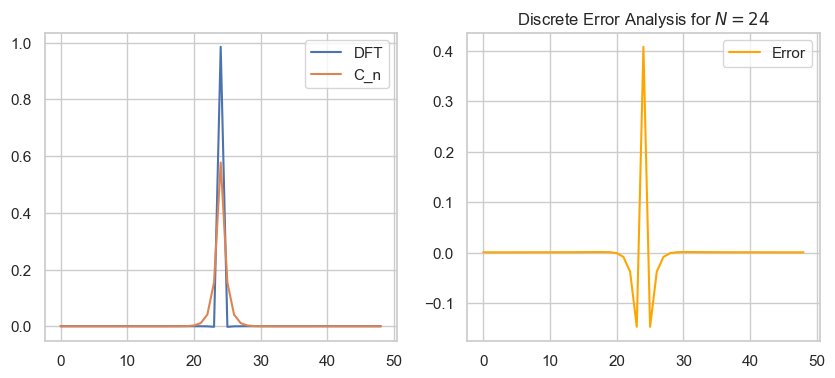

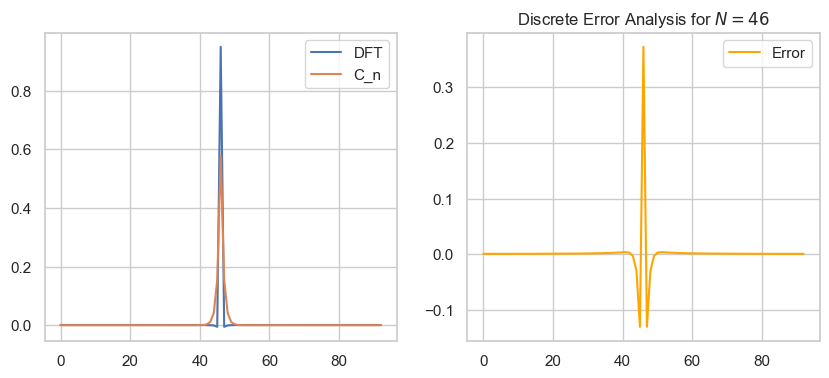

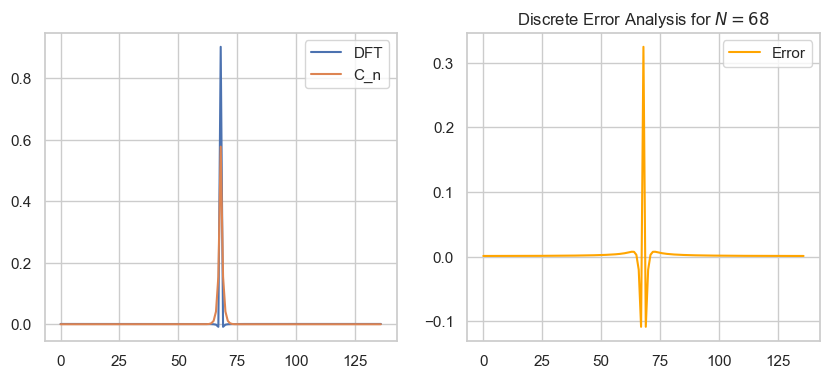

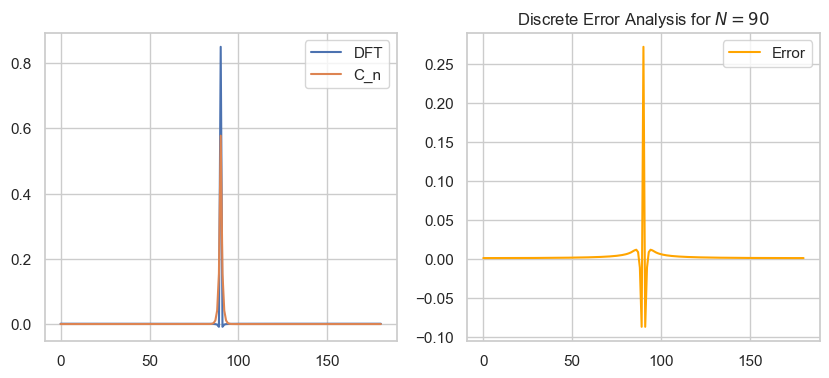

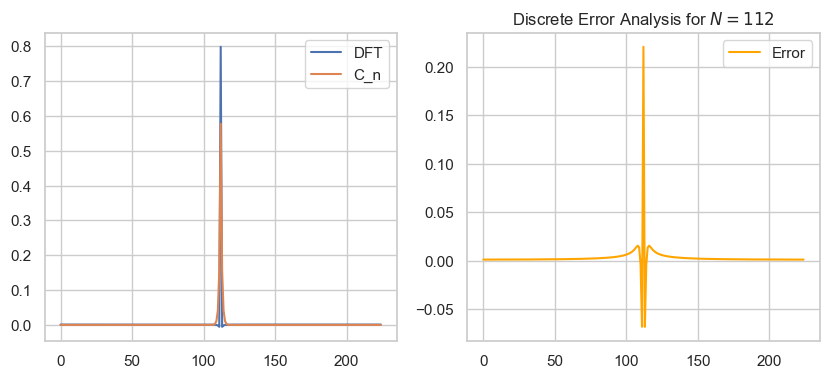

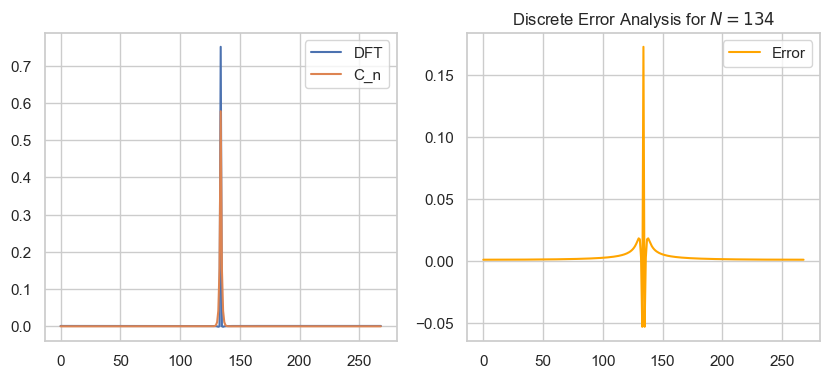

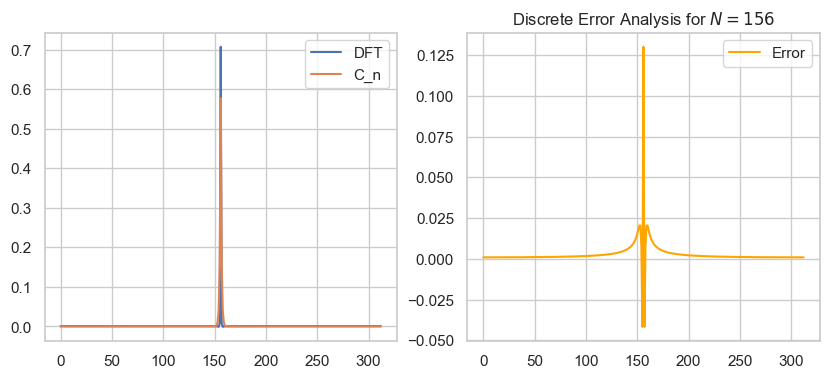

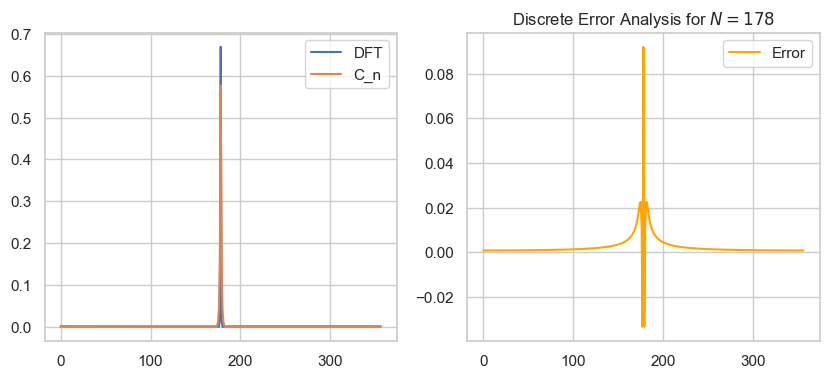

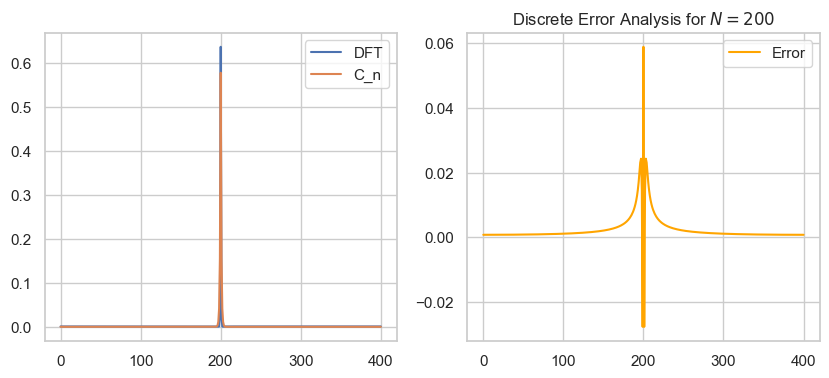

In [21]:
N = 25

Ns = np.linspace(3, 200, 10, dtype=int)

for N in Ns:
    dft_components = np.fft.fftshift(np.fft.fft(y_exact, n=2*N + 1, norm="forward"))
    Ns = np.arange(-N, N + 1)
    Cn_components = list(map(C_n, Ns))

    errors = np.abs(dft_components) - np.abs(Cn_components)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
    ax1.plot(dft_components, label="DFT")
    ax1.plot(list(map(C_n, np.arange(-N, N + 1))), label="C_n")
    ax1.legend()

    ax2.plot(errors, label="Error", color="orange")
    ax2.legend()

    plt.title(f"Discrete Error Analysis for $N={N}$")
    # ax2.legend()
